## Import

In [1]:
import sklearn
from sklearn import preprocessing
# Import SVC from sklearn.svm here
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

### Load data 

In [2]:
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Find Minimum and Maximum value for each feature 

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Set features and output 

In [22]:
X = data.iloc[0:,0:13].values
Y = data.iloc[:,13]

### Using Hold Out

In [25]:
# Split your data into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=42 , stratify =Y)

In [26]:
# Fit SVC() model with training data
model = SVC()
model.fit(X_train,y_train)

SVC()

In [27]:
# Make predictions for test data
y_pred = model.predict(X_test)

In [29]:
# Print training and testing accuracy
train_score= model.score(X_train, y_train)
print(train_score)
test_score= model.score(X_test, y_test)
print(test_score)

0.6861924686192469
0.7045454545454546


### Using Data Preprocessing

In [30]:
# Scale your data using preprocessing.MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
X_m = scaler.fit_transform(X)

In [31]:
# Split your pre-processed data into train and test sets

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X_m , Y , test_size = 0.3 , random_state = 42, stratify=Y)

In [35]:
# Fit model with the pre-processed training data
model.fit(X_train ,y_train)

SVC()

In [37]:
# Make predictions for the pre-processed test data
y_pred = model.predict(X_test)

In [39]:
# Print training and testing accuracy
train_score= model.score(X_train, y_train)
print(train_score)
test_score= model.score(X_test, y_test)
print(test_score)

0.9065550906555091
0.8863636363636364


### Optimization 

In [40]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 

In [41]:
# Set the parameters for the SVC model
grid_params = {'C': [0.01, 0.1, 1, 10],
'gamma': [1, 10, 100]}

In [42]:
# Build your GridSearchCV with the parameters' setting
grid_search= GridSearchCV(model, grid_params, cv=10)

In [45]:
# Split your pre-processed data into train+validation set and test set 
X_trainval , X_test , y_trainval , y_test = train_test_split(X_m , Y , test_size = 0.3 , random_state = 42, stratify=Y)

In [46]:
# Split train+validation set into training and validation sets 
X_trian , X_valid , y_train , y_valid = train_test_split(X_trainval , y_trainval , test_size = 0.3 , random_state = 42)

In [47]:
# Train your GridSearchCV
grid_search.fit(X_trian,y_train )

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 10, 100]})

In [48]:
# Print the best parameters
grid_search.best_params_

{'C': 10, 'gamma': 10}

In [49]:
# Print the best score on cross-validation
grid_search.best_score_

0.9481176470588236

In [51]:
# Rebuild the SVC model with the best parameters on the combined training and validation set, 
# and evaluate it on the test set
model_cv= grid_search.best_estimator_
model_cv.fit(X_trainval , y_trainval)
y_pred = model_cv.predict(X_test)


In [53]:
# Print training and testing accuracy
training_accuracy=model_cv.score(X_trainval , y_trainval)
print(training_accuracy)
testing_accuracy= model_cv.score(X_test , y_test)
print(testing_accuracy)

1.0
0.9902597402597403


### Visualize the confusion matrix for the best model 

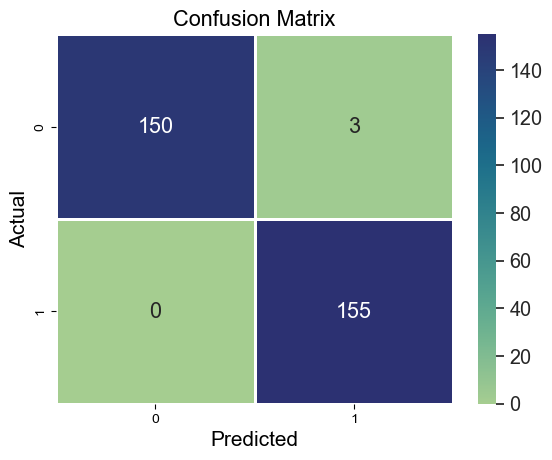

<Figure size 1000x700 with 0 Axes>

In [54]:
from sklearn import metrics
# Import seaborn library here
import seaborn as sns
import matplotlib.pyplot as plt

# Fill in the parameters for confusion_matrix function
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="crest", linewidth=2)

ax.set_title('Confusion Matrix')
ax.set_xlabel("Predicted", fontsize =15)
ax.set_ylabel("Actual", fontsize=15)

# Print the graph
plt.show()